## <font color='grey'> Objective </font>

We simulate the process of diffusion with 'coin flips'. At each time step, the particle can either move to the left or to the right, each with probability of 0.5. From here, we can see how the distance a diffusing particle travels along with time.

## <font color='grey'> Modeling 1-D diffusion with coin flips </font>

Diffusion can be understood as random motion in space cuased by thermal fluctuations in the environment. In the cytoplasm of the cell different molecules undergo a 3-dimensional diffusive motion. While, on the cell membrane, the diffusion is mostly 2-D. Here we discuss a 1-D diffusion motino to make it simpler, but the idea can be exptend into higher dimensions.

In [1]:
# import module
import numpy as np
import matplotlib.pyplot as plt

# show figures in the notebook
%matplotlib inline

# For pretty plots
import seaborn as sns

rc={'lines.linewidth': 2, 'axes.labelsize':14, 'axes.titlesize':14, 'xtick.labelsize':14, 'ytick.labelsize':14}
sns.set(rc=rc)

To simulate the flipping of a coin, we will make use of numpy's function random.uniform() to produce a random number between 0 and 1. 

Let's see it in action by printing a few random numbers.

In [3]:
for i in range(10):
    print(np.random.uniform())

0.5751392699463092
0.6637690142741637
0.10492729186264638
0.43361432968781854
0.4955793383145265
0.29726226438492587
0.9249494283534725
0.026587631440720738
0.6363132843314045
0.8695040246207757


Now we can use these random numbers to simulate the process of a diffusing particle that moves in 1 dimension, where any value below 05 corresponds to step to the left, any value above 0.5 corresponds to a step to the right.

We then keep track of the position of a particle for 1000 steps, where each position is +1 or -1 from the previous position, as determined by the result of a coin flip.

Text(0, 0.5, 'position')

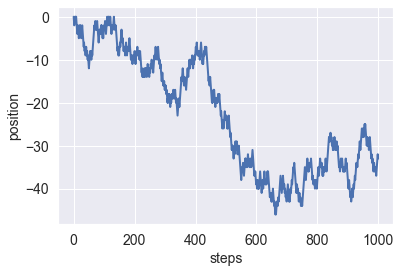

In [5]:
# number of steps
n_steps = 1000

# array to store walker positions
positions = np.empty(n_steps)

# initialize the walker's position
positions[0] = 0

# simulate the particle moving and store the new position
for i in range(1, n_steps):
    # generate random number
    rand = np.random.uniform()
    
    # step in the positive direction
    if rand > 0.5:
        positions[i] = positions[i-1] + 1
    # step in the negative direction
    else:
        positions[i] = positions[i-1] - 1
# show the tragjectory
plt.plot(positions)
plt.xlabel('steps')
plt.ylabel('position')

We can see from the plot that the position of the particle moves from the origin in an undirected fashion as a result of the randomness of the steps. However, it is hard to conclude anything from this single trace. Only by simulating many of these trajectories can we begin to conclude some of the scaling properties of diffusing particles.


## <font color='grey'> Averaging behavior of diffusing particles </font>

Now let's generate multiple random trajectories and see their collective behavior. To do this, we will create a2-D numpy array where each row will be a different trajectory. 2D array can be sliced as $ [i, :] $which refers to all values in the ith row as one trajectory; and [:, j] refers to all the vales in jth column.

In [6]:
# Number of trajectories
n_traj = 1000

# 2-D array for storing the trajectories
positions_2D = np.empty([n_traj, n_steps])

# Initialize the position of all the walkers to 0
positions_2D[:, 0] = 0

# First iterate through the trajectories
for i in range(n_traj):
    
    # then iterate through the steps
    for j in range(1, n_steps):
        
        # generate random number
        rand = np.random.uniform()
        
        # step in the positive direction
        if rand > 0.5:
            positions_2D[i, j] = positions_2D[i, j-1] + 1
            
        # step in the negative direction
        else:
            positions_2D[i, j] = positions_2D[i, j-1] - 1
            

Now let's plot the results, once again by looping

Text(0, 0.5, 'position')

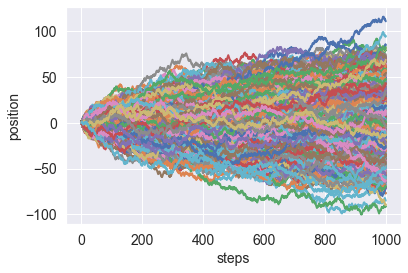

In [7]:
# iterate through each trajectory and plot
for i in range(n_traj):
    plt.plot(positions_2D[i, :])
    
# label
plt.xlabel('steps')
plt.ylabel('position')

The overall tendency is that the average displacement from the origin increases with the number of time steps. Because each trajectory is assigned a solid color and all trajectories are overlaid on top of each other, it is hard to see the distribution of the walker position at a given number of times steps. To get a better intuition about the distribution of the walker's position at different steps, we will assign the same color to all trajectories and add transparency to each of them so that the more densely populated regions have a darker color.

Text(0, 0.5, 'position')

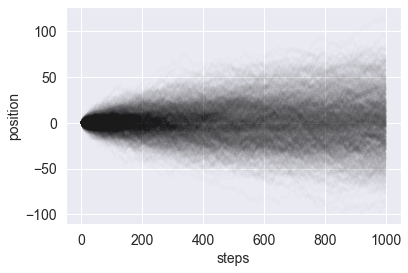

In [8]:
# iterate through each trajectory and plot
for i in range(n_traj):
    # lower transparency alpha corresonds to lighter line
    plt.plot(positions_2D[i,:], alpha = 0.01, color='k')
    
# label
plt.xlabel('steps')
plt.ylabel('position')

As we can see, over the course of diffusion the distribution of the walker's position becomes wider but remains centered around the origin, indicative of the unbiased nature of the random walk. 

To see how the walks are distributed at this last time point, we can make a histogram of the walk's final positions.

Text(0, 0.5, 'frequency')

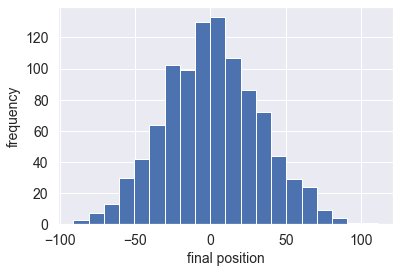

In [10]:
# Make a histogram of final positions
_ = plt.hist(positions_2D[:, -1], bins = 20)
plt.xlabel('final position')
plt.ylabel('frequency')

As expected, the distribution is centered around the origin and has a Gaussian-like shape. The more trajectories we sample, the 'more Gaussian' the distribution will become. However, we may notice that the distribution appears to change depending on the number of bins we choose. This is called bin bias, which doesn't reflect anything abou t our data itself, just how we choose to represent it. An alternative (and arguable better) way to present the data is as an empirical cumulative distribution function (or ECDF), where we don't specify a number of bins, but instead plot each data point. For our cumulative frequency distribution, the x-axis corresponds to the final position of a particle and the y-axis corresponds to the proportion of particles that ended at this position.

Text(0, 0.5, 'cumulative frequency')

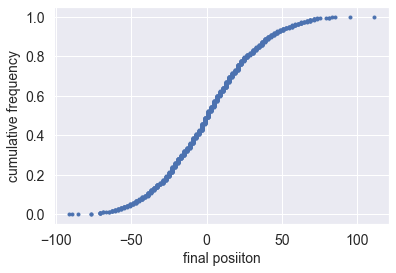

In [13]:
# sort the final positions
sorted_positions = np.sort(positions_2D[:, -1])

# make the corresponding y_value (i.e. percentiles)
y_values = np.linspace(start=0, stop = 1, num=len(sorted_positions))

# plot the cumulative histogram
plt.plot(sorted_positions, y_values, '.')
plt.xlabel('final posiiton')
plt.ylabel('cumulative frequency')

This way of visualization makes it easier to tel that distribution of walks is in fact symmetric around 0, that is 50% of the walkers ended on a negative position, while 50% of the walk ended on a positive position.

## <font color='grey'> Comparing to the binomial distribution

We have discussed that the final particle positions should be binomially distributed, while it would be nice to verify this in some way. To do this, we can plot the known binomial distribution by calling the stats.binom.pmf(k,n,p) on top of our histograms. This function returns the probability of getting k heads, from n coin flips, given probability p of getting heads. We have seen that our diffusing particles ultimately take on some final position on the interval [-100, 100]. To understand the probability of this occurring, we need to convert these positions to the number of "heads" (or the number of right steps taken). In this case, the number of heads corresponds to the interval [450, 550]. That is, if you got 450 heads (and thus 550 tails), you have travelded 100 more steps to the left than to the right and ultimately ended up at position -100. By the converse argument, if you got 550 heads, you end up at position 100. Let's use stats.binom.pmf() to determine the chance of getting these number of heads for the total number of time steps(1000) we computed and plot the results over this range [450, 550].

Text(0, 0.5, 'frequency')

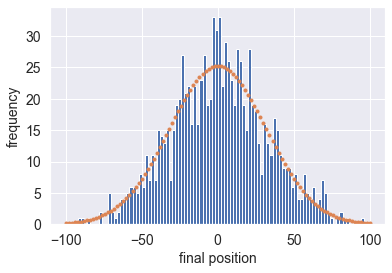

In [16]:
from scipy.stats import binom
# make a histogram of final positions and hard-code the bin positions
_ = plt.hist(positions_2D[:, -1], bins = range(-100, 100, 2))

# final positions occur on the interval [-100, 100]
final_positions = np.linspace(-100, 100, 101)

# number of heads corresponding to the final_position
# should be interval [450, 500]
n_heads = (n_steps + final_positions)/2

# use binomal distribution to determine prob of n_heads from taking n_steps
# scaled by the number of trajectories for overlaying on our histogram
binomial_pmf = binom.pmf(n_heads, n_steps, p=0.5)*n_traj

# plot and label
plt.plot(final_positions, binomial_pmf,'.')
plt.xlabel('final position')
plt.ylabel('frequency')


These seem to overlap pretty well, and it seems as though our final particle positions are in fact binomially distributed. To see this even more explicityly, we can plot the CDF for the binomial distribution over our ECDF. This is done by simply dusing stats.binom.cdf() instead of stats.binom.pmf().

Text(0, 0.5, 'cumulative frequency')

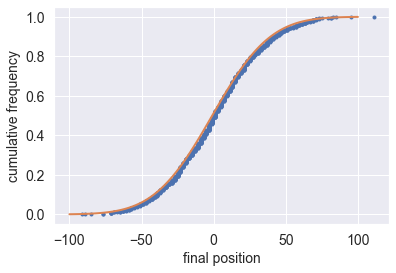

In [18]:
# sort the final positions
sorted_positions = np.sort(positions_2D[:, n_steps-1])
# make the corresponding y_values (i.e. percentiles)
y_values = np.linspace(start = 0, stop=1, num=len(sorted_positions))

# binomial cdf 
binomial_cdf = binom.cdf(n_heads, n_steps, p=0.5)

# plot the cumulative histogram
plt.plot(sorted_positions, y_values, '.')
plt.plot(final_positions, binomial_cdf)
plt.xlabel("final position")
plt.ylabel('cumulative frequency')


## <font color='grey'> Mean squared displacement (MSD) </font>

From visual inspection, we could tell that the particles tend to go further away from the origin as the number of steps increases. To get a more quantitative understanding of the particles' positions, we can compute something known as the mean squared displacement (MSD). This serves as a metric of how far the particles have traveled from the origin that is invariant to the directin the particle moved. Let's plot how the mean squared displacement scales with the number of steps.

Text(0, 0.5, 'mean squared displacement')

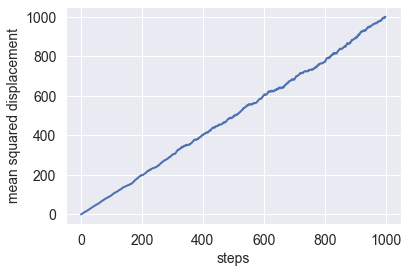

In [19]:
# aray for storing the MSD
MSDs = np.empty(n_steps)

# calculate the MSDs for each step
for j in range(n_steps):
    MSDs[j] = np.mean(positions_2D[:, j]**2)
    
# plot the MSD
plt.plot(MSDs)
plt.xlabel('steps')
plt.ylabel('mean squared displacement')

We see that the mean squared displacement clearly increases linearly with the number of steps. This leads to the important reuslt that for diffusion, the time it takes to reach a certain distance scales with the square of that distance. This means that by diffusion, it will take 4 times as long to travel twice the distance. This is in contrast to ballistic motion (like a car driving on a freeways)，where the time to travel scales linearly with the distance.

Theis result leads us to the relationship that the time t it takes to diffuses scales with $\frac{L^2}{D}$, where L is the length and D is the diffusion coefficient. 

Let's plot this relationship t VS. L for length scales relevant to biology, such as $ 1 \mu m$ (i.e. an E.coli) to 1 m (i.e. the longest neuron in human body). We will do this for D = 10 $ \mu m^2/sec $, which is typical for a protein in cytoplasm.

Text(0, 0.5, 'time (sec)')

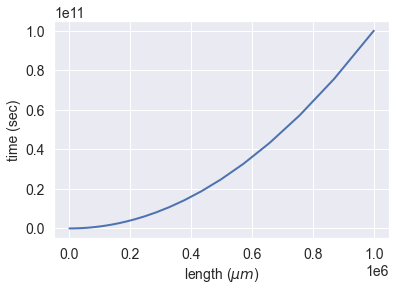

In [20]:
# diffusion constant
D = 10 # $\mu m^2/sec$

# range of lengths in microns from 10^0 to 10^6.
L = np.logspace(0, 6, 100)

# calculate time to diffuse
t = L**2/D # sec

# and plot
plt.plot(L, t)
plt.xlabel('length ($ \mu m$)')
plt.ylabel('time (sec)')



We can see from this plot that we recapitulate what we have calculated above that it takes $ 10^11 $ seconds, or $ \approx 3000 $ years for a protein to diffuse the length of a meter! However, it is hard to tell what is going on at small length scales, so we can plot the data on a log-log plot.

Text(0, 0.5, 'time (sec)')

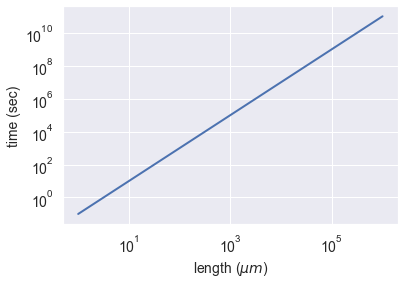

In [21]:
# Make a log-log plot of the diffusion timescale
plt.loglog(L, t)
plt.xlabel('length ($\mu m$)')
plt.ylabel('time (sec)')

Now we can see better that for short length scales of 1 $ \mu m$, the time to diffuse is quite fast, less than a second. As we go to length scales of hundreds of microns, the diffusion time become on the order of minutes to an hour. This provides an argument for why bacteria use diffusion as a means of transport within the cell, while eukaryotic cells repy on directed transport via motor proteins to shuttle materials around the cell.